# Q1

Fitted parameters (Gradient Descent): [-3.25422549e+36 -2.07492965e+38]
Final cost: 8.72007626150772e+79
Fitted parameters (sklearn): [-13.24958124   1.20603015]
Predicted daughter's height for mother height 63: 62.73031825795645
Mean Squared Error: 6.101619207146855
Root Mean Squared Error: 2.470145584200829


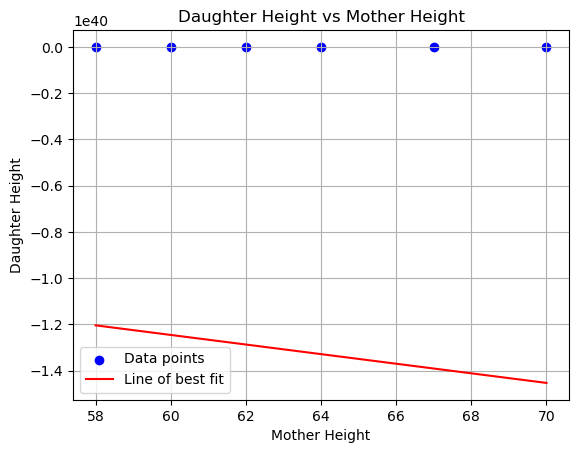

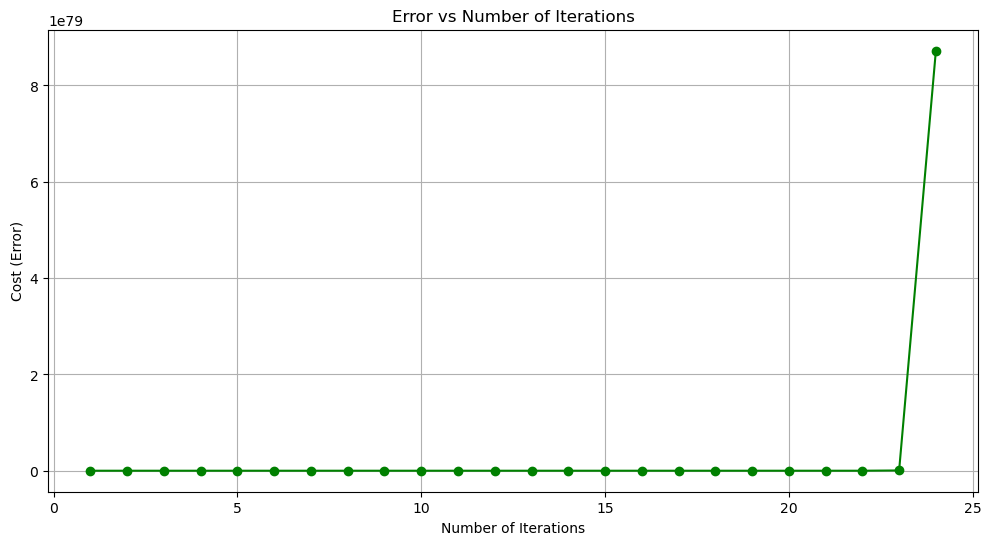

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the data
data = pd.read_csv('heights.csv')
X = data['mother_height'].values.reshape(-1, 1)
y = data['daughter_height'].values

# Gradient Descent Parameters
alpha = 0.01  # Learning rate
iterations = 24  # Total iterations
m = len(y)  # Number of training examples

# Initialize parameters
theta = np.zeros(2)  # Intercept and slope

# Add intercept term to X
X_b = np.c_[np.ones((m, 1)), X]

# Gradient Descent
def compute_cost(theta, X_b, y):
    m = len(y)
    predictions = X_b.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X_b, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X_b.dot(theta)
        errors = predictions - y
        theta -= (alpha / m) * (X_b.T.dot(errors))
        cost_history[i] = compute_cost(theta, X_b, y)
    
    return theta, cost_history

# Perform Gradient Descent
theta, cost_history = gradient_descent(X_b, y, theta, alpha, iterations)

# Print results
print(f"Fitted parameters (Gradient Descent): {theta}")
print(f"Final cost: {cost_history[-1]}")

# Using sklearn for comparison
model = LinearRegression()
model.fit(X, y)
sklearn_theta = np.array([model.intercept_, model.coef_[0]])

print(f"Fitted parameters (sklearn): {sklearn_theta}")

# Predicting daughter's height for given mother's height of 63
mother_height_new = np.array([[63]])
daughter_height_pred = model.predict(mother_height_new)
print(f"Predicted daughter's height for mother height 63: {daughter_height_pred[0]}")

# Compare errors
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot line of best fit
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_vals_b = np.c_[np.ones((100, 1)), x_vals]  # Add intercept term
y_vals = x_vals_b.dot(theta)  # Compute predictions using theta
plt.plot(x_vals, y_vals, color='red', label='Line of best fit')

# Labels and legend
plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.title('Daughter Height vs Mother Height')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Plot error over iterations
plt.figure(figsize=(12, 6))
plt.plot(range(1, iterations + 1), cost_history, color='green', marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (Error)')
plt.title('Error vs Number of Iterations')
plt.grid(True)
plt.show()

# Q2

Fitted parameters (Gradient Descent): [-1.04387212  0.36556864]
Fitted parameters (sklearn): [-5.26410791  1.16979937]
Probability of passing with 3.5 hours of study: [0.55863352]
Probability of passing with 7.5 hours of study: [0.8452593]
Accuracy: 0.75


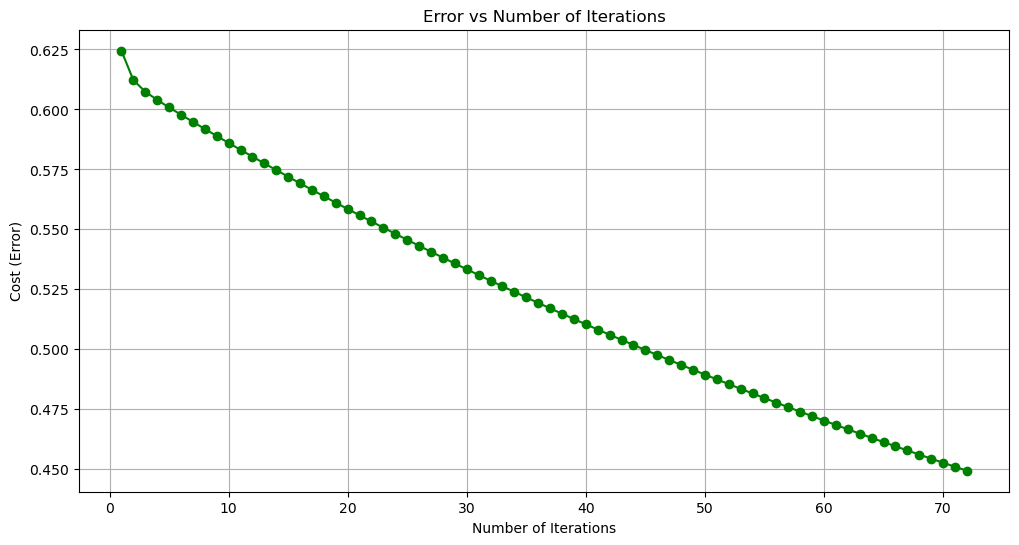

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('pass_fail.csv')
X = data['hours_of_study'].values.reshape(-1, 1)
y = data['pass'].values

# Gradient Descent Parameters
alpha = 0.1  # Learning rate
iterations = 24  # Total iterations
epochs = 3  # Number of epochs
m = len(y)  # Number of training examples

# Initialize parameters
theta = np.zeros(2)  # Intercept and slope

# Add intercept term to X
X_b = np.c_[np.ones((m, 1)), X]

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost Function
def compute_cost(theta, X_b, y):
    m = len(y)
    predictions = sigmoid(X_b.dot(theta))
    cost = (-1 / m) * (np.dot(y, np.log(predictions)) + np.dot((1 - y), np.log(1 - predictions)))
    return cost

# Gradient Descent
def gradient_descent(X_b, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = sigmoid(X_b.dot(theta))
        errors = predictions - y
        theta -= (alpha / m) * (X_b.T.dot(errors))
        cost_history[i] = compute_cost(theta, X_b, y)
    
    return theta, cost_history

# Perform Gradient Descent with epochs
cost_history = np.zeros(iterations * epochs)
for epoch in range(epochs):
    theta, epoch_cost_history = gradient_descent(X_b, y, theta, alpha, iterations)
    cost_history[epoch * iterations: (epoch + 1) * iterations] = epoch_cost_history

# Print results
print(f"Fitted parameters (Gradient Descent): {theta}")

# Using sklearn for comparison
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)
sklearn_theta = np.concatenate(([model.intercept_[0]], model.coef_[0]))

print(f"Fitted parameters (sklearn): {sklearn_theta}")

# Predicting probability for given hours of study
def predict_probability(hours):
    X_new = np.array([[1, hours]])
    return sigmoid(X_new.dot(theta))

# Predictions for 3.5 and 7.5 hours
prob_3_5 = predict_probability(3.5)
prob_7_5 = predict_probability(7.5)
print(f"Probability of passing with 3.5 hours of study: {prob_3_5}")
print(f"Probability of passing with 7.5 hours of study: {prob_7_5}")

# Class labels prediction
y_pred = sigmoid(X_b.dot(theta)) >= 0.5
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

# Plot error over iterations
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cost_history) + 1), cost_history, color='green', marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (Error)')
plt.title('Error vs Number of Iterations')
plt.grid(True)
plt.show()

# Q3

Coefficients: [[-0.01611029 -1.00104174]]
Intercept: [-0.87225817]
Accuracy: 1.0
Confusion Matrix:
[[4 0]
 [0 2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



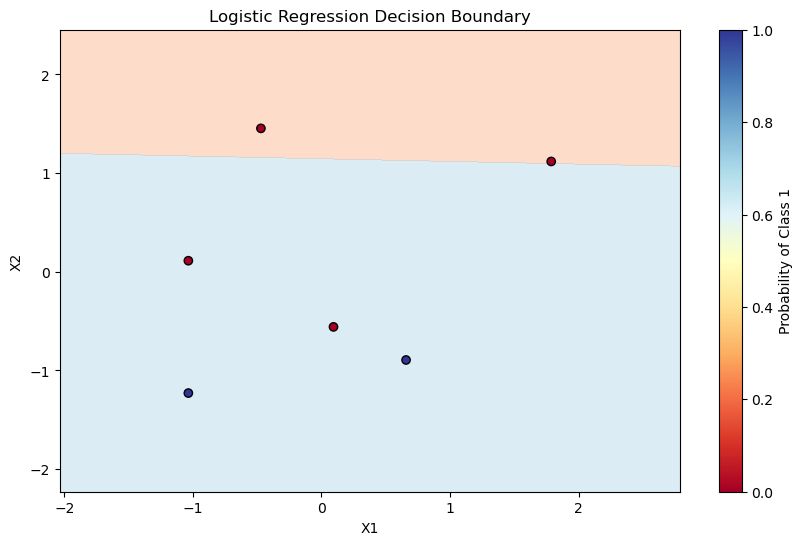

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
data = pd.read_csv('multi_logistic_data.csv')

# Extract features and target variable
X = data[['x1', 'x2']].values
y = data['y'].values

# Logistic Regression requires the target variable to be binary
# Convert the target variable to binary for logistic regression
# Using thresholding method, e.g., classify as 1 if y >= 0, else 0
y_binary = (y >= 0).astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y_binary)

# Predict outcomes
y_pred = model.predict(X_scaled)

# Print model coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Print accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_binary, y_pred)
conf_matrix = confusion_matrix(y_binary, y_pred)
class_report = classification_report(y_binary, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Plot decision boundary
plt.figure(figsize=(10, 6))
x1_range = np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 100)
x2_range = np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
grid_points_scaled = scaler.transform(grid_points)
probs = model.predict_proba(grid_points_scaled)[:, 1].reshape(x1_grid.shape)

plt.contourf(x1_grid, x2_grid, probs, levels=[0, 0.5, 1], cmap='RdYlBu', alpha=0.3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_binary, edgecolor='k', cmap='RdYlBu')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression Decision Boundary')
plt.colorbar(label='Probability of Class 1')
plt.show()
